In [14]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import scipy as sp
import pandas as pd
import itertools
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [15]:
pos = [5, 8.5, 15, 21.5]
combinations = list(itertools.product(pos, repeat=4))
df = pd.DataFrame(combinations, columns=["pos1", "pos2", "pos3", "pos4"])

df["CM_x"] = df["pos1"] - df["pos3"]
df["CM_y"] = df["pos4"] - df["pos2"]
df["CM_r"] = np.sqrt(df["CM_x"]**2 + df["CM_y"]**2)
df["CM_phi"] = np.arctan2(df["CM_y"], df["CM_x"])

df["MoI"] = (df["pos1"]**2 + df["pos2"]**2 + df["pos3"]**2 + df["pos4"]**2)/4


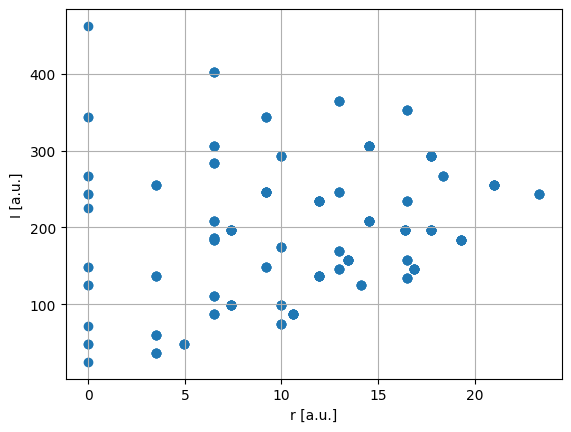

In [22]:
plt.figure()
plt.scatter(df["CM_r"], df["MoI"])
plt.xlabel("r [a.u.]")
plt.ylabel("I [a.u.]")
# plt.title("Moment of Inertia vs Center of Mass Radius")
plt.grid()
plt.savefig("MoI_vs_CMr.png")
plt.show()

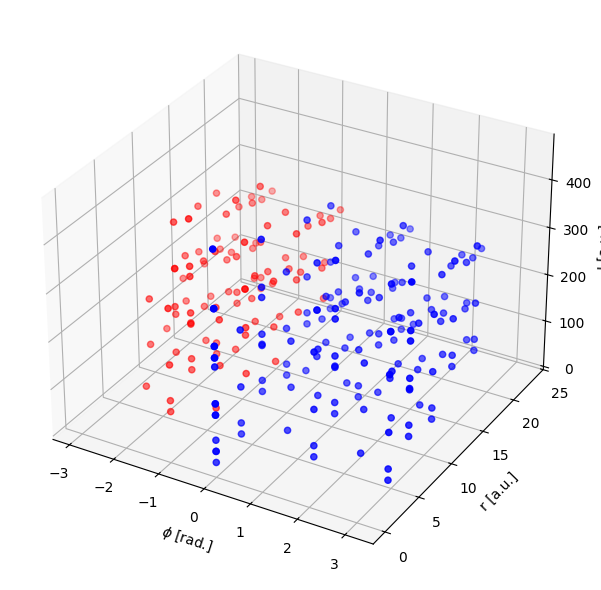

In [40]:
# Assuming your dataframe is named df
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
color = np.where(df["CM_phi"]>=0, "blue", "red")

ax.scatter(df["CM_phi"], df["CM_r"], df["MoI"], c=color, marker='o')

# Labels
ax.set_ylabel("r [a.u.]")
ax.set_xlabel("$\\phi$ [rad.]")
ax.set_zlabel("I [a.u.]")
# ax.set_title("3D Scatter Plot of CM_r, CM_phi, and MoI")
plt.tight_layout()
plt.savefig("3D_scatter_CMr_CMphi_MoI.png")
plt.show()

In [18]:
# Create an interactive 3D scatter plot with hover information
fig = px.scatter_3d(df, 
                    x='CM_r', 
                    y='CM_phi', 
                    z='MoI',
                    hover_data=['pos1', 'pos2', 'pos3', 'pos4'],
                    title='Domain',
                    labels={
                        'CM_r': 'Center of Mass Radius',
                        'CM_phi': 'Center of Mass Angle (radians)',
                        'MoI': 'Moment of Inertia'
                    })

# Customize the appearance
fig.update_traces(marker=dict(size=5, opacity=0.8))

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='CM_r',
        yaxis_title='CM_phi',
        zaxis_title='MoI',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    width=800,
    height=600
)

fig.show()